In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


In [4]:
ppi_pairs = pd.read_csv('9606.protein.links.v12.0.txt', delim_whitespace=True, header=0)
num_entries = ppi_pairs.shape[0]
print(f"The DataFrame 'ppi_pairs' has {num_entries} rows.")

The DataFrame 'ppi_pairs' has 13715404 rows.


In [5]:
plt.figure(figsize=(8, 6))
plt.hist(ppi_pairs['combined_score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Combined Score')
plt.ylabel('Frequency')
plt.title('Histogram of PPI Interaction Scores')
plt.show()

<IPython.core.display.Javascript object>

In [6]:
threshold = 800
protein_links = ppi_pairs[ppi_pairs['combined_score'] > threshold]
protein_links.to_csv('protein_links.csv', index=False)

The CSV file 'protein_links.csv' has 321479 rows.


In [8]:
class Protein:
    def __init__(self, protein1, protein2, combined_score):
        self.protein1 = protein1
        self.protein2 = protein2
        self.combined_score = combined_score

protein_list = []
file_path = 'protein_links.csv'
with open(file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    next(csv_reader)  
    for row in csv_reader:

        protein = Protein(row['protein1'], row['protein2'], row['combined_score'])
        protein_list.append(protein)

In [9]:
my_dict = {}
dict_file_path = '9606.protein.info.v12.0.txt'
with open(dict_file_path, 'r') as file:
    next(file) 
    for line in file:
        entries = line.strip().split('\t')
    
        if len(entries) >= 2:
            key = entries[0]
            value = entries[1]
            my_dict[key] = value

In [10]:
matching_results = []

def match_objects_to_keys(protein_list, my_dict):
    for protein in protein_list:
        protein1_name = my_dict.get(protein.protein1, "Unknown")
        protein2_name = my_dict.get(protein.protein2, "Unknown")
        matching_results.append((protein1_name, protein2_name))
match_objects_to_keys(protein_list, my_dict)
num_entries = len(matching_results)
print("Number of entries:", num_entries)
#for result in matching_results:
    #print(f"Protein 1: {result[0]}, Protein 2: {result[1]}")

Number of entries: 321477


In [11]:
output_tsv_file = 'uniprot_interactome.tsv'
with open(output_tsv_file, 'w', newline='') as tsvfile:
    tsv_writer = csv.writer(tsvfile, delimiter='\t')
    for result in matching_results:
        tsv_writer.writerow(result)

print(f'Results saved as interactome at '{output_tsv_file}'")

Matching results (excluding the header) have been saved to 'uniprot_interactome.tsv'


In [2]:
file_path = "uniprot_interactome.tsv"
G = nx.Graph()

with open(file_path, 'r') as file:
    for line in file:
        line_data = line.strip().split('\t')
        node1 = line_data[0]
        node2 = line_data[1]
        G.add_edge(node1, node2)
G.remove_edges_from(nx.selfloop_edges(G))
print("Network contains %s nodes and %s links" % (G.number_of_nodes(), G.number_of_edges()))

Network contains 14463 nodes and 160739 links


In [63]:
dtypes = {9: 'str',  11: 'str',  12: 'str', 13: 'str',23: 'str',29: 'str'}  
gwas_data= pd.read_csv("gwas_catalog_v1.0.2-associations_e110_r2023-09-25.tsv", sep= "\t", dtype= dtypes)

In [64]:
columns_to_delete = ['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL', 'LINK', 'STUDY', 
                     'INITIAL SAMPLE SIZE', 'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS', 'MAPPED_GENE',
                     'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS', 'MERGED', 'SNP_ID_CURRENT', 'INTERGENIC', 'RISK ALLELE FREQUENCY','PVALUE_MLOG', 'P-VALUE (TEXT)', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV', 'SNP_GENE_IDS', 'MAPPED_TRAIT', 'STUDY ACCESSION', 'GENOTYPING TECHNOLOGY']
gwas_data.drop(columns=columns_to_delete, inplace=True)
gwas_data['EFO_ID'] = gwas_data['MAPPED_TRAIT_URI'].str.replace('http://www.ebi.ac.uk/efo/', '')
gwas_data.drop(columns=['MAPPED_TRAIT_URI'], inplace=True)
#gwas_data = gwas_data[gwas_data['CONTEXT'].str.contains('intergenic_variant', case=True, na=True)]
gwas_data=gwas_data[(gwas_data['OR or BETA'] < 0.8) | (gwas_data['OR or BETA'] > 1.2) &(gwas_data['P-VALUE'] < 0.01)]

                        DISEASE/TRAIT                   REPORTED GENE(S)  \
0                              Height                             ZBTB38   
1                              Height                              ITM2A   
2                              Height      COIL, RISK, NOG, DGKE, TRIM25   
3                              Height                     L3MBTL3, SAMD3   
4                              Height  DIS3L2, NPPC, COPS7B, PDE6D, PTMA   
...                               ...                                ...   
552949  Retinal arteriolar tortuosity                                NaN   
552950  Retinal arteriolar tortuosity                                NaN   
552951  Retinal arteriolar tortuosity                                NaN   
552952  Retinal arteriolar tortuosity                                NaN   
552953  Retinal arteriolar tortuosity                                NaN   

                   CONTEXT       P-VALUE  OR or BETA       EFO_ID  
0           intron_

In [65]:
column_name = 'EFO_ID'
gwas_data[column_name] = gwas_data[column_name].str.replace('http://purl.obolibrary.org/obo/', '')
gwas_data[column_name] = gwas_data[column_name].str.split(', ')
gwas_data = gwas_data.explode(column_name).reset_index(drop=True)
gwas_data['REPORTED GENE(S)'] = gwas_data['REPORTED GENE(S)'].astype(str)

                        DISEASE/TRAIT                   REPORTED GENE(S)  \
0                              Height                             ZBTB38   
1                              Height                              ITM2A   
2                              Height      COIL, RISK, NOG, DGKE, TRIM25   
3                              Height                     L3MBTL3, SAMD3   
4                              Height  DIS3L2, NPPC, COPS7B, PDE6D, PTMA   
...                               ...                                ...   
471063  Retinal arteriolar tortuosity                                nan   
471064  Retinal arteriolar tortuosity                                nan   
471065  Retinal arteriolar tortuosity                                nan   
471066  Retinal arteriolar tortuosity                                nan   
471067  Retinal arteriolar tortuosity                                nan   

                   CONTEXT       P-VALUE  OR or BETA       EFO_ID  
0           intron_

In [66]:
gwas_data = gwas_data.assign(REPORTED_GENES=gwas_data['REPORTED GENE(S)'].str.split(', ')).explode('REPORTED_GENES').reset_index(drop=True)
gwas_data.drop(columns=['REPORTED GENE(S)'], inplace=True)
print(gwas_data)

                        DISEASE/TRAIT             CONTEXT       P-VALUE  \
0                              Height      intron_variant  1.000000e-27   
1                              Height  intergenic_variant  3.000000e-06   
2                              Height  intergenic_variant  1.000000e-07   
3                              Height  intergenic_variant  1.000000e-07   
4                              Height  intergenic_variant  1.000000e-07   
...                               ...                 ...           ...   
344828  Retinal arteriolar tortuosity      intron_variant  1.000000e-11   
344829  Retinal arteriolar tortuosity  intergenic_variant  2.000000e-11   
344830  Retinal arteriolar tortuosity      intron_variant  2.000000e-11   
344831  Retinal arteriolar tortuosity      intron_variant  2.000000e-11   
344832  Retinal arteriolar tortuosity                 NaN  3.000000e-11   

        OR or BETA       EFO_ID REPORTED_GENES  
0            7.400  EFO_0004339         ZBTB38  
1

In [9]:
#cancer/disease nodes workflow
from rdflib import Graph
import urllib.parse
import os
graph = Graph()

#_____EFO ONTOLOGY______________________________________
file_name = "efo-2.owl"
file_path= 
graph.parse(file_path)
from rdflib import RDF, OWL, RDFS, URIRef
for subject, predicate, obj in graph:
    if predicate == RDF.type and obj == OWL.Class:
        pass
nodes_all = list(graph.all_nodes())
disease_uri = URIRef('http://www.ebi.ac.uk/efo/EFO_0000408')
cancer_uri = URIRef('http://purl.obolibrary.org/obo/MONDO_0004992')

#Defining the queries, here selecting the data which has disease/cancer as an ancestor 
sparql_query_disease = f"""
    SELECT ?ancestor
    WHERE {{ ?ancestor <http://www.w3.org/2000/01/rdf-schema#subClassOf>* <{disease_uri}> }}
"""

sparql_query_cancer = f"""
    SELECT ?ancestor
    WHERE {{ ?ancestor <http://www.w3.org/2000/01/rdf-schema#subClassOf>* <{cancer_uri}> }}
"""

In [10]:
number_all = len(nodes_all)
print(f'# of all nodes: {number_all}')

# of all nodes: 656312


In [11]:
result_disease = graph.query(sparql_query_disease)
result_cancer= graph.query(sparql_query_cancer)
num_diseases = len(list(result_disease))
num_cancer=len(list(result_cancer))
print(f"Number of disease nodes: {num_diseases}")
print(f"Number of cancer nodes: {num_cancer}")

Number of disease nodes: 14665
Number of cancer nodes: 1139


In [12]:
disease_nodes = []

for row in result_disease:
    uri_string = str(row[0])
    if 'http://purl.obolibrary.org/obo/' in uri_string:
        identifier = uri_string.replace('http://purl.obolibrary.org/obo/', '')
    elif 'http://www.ebi.ac.uk/efo/' in uri_string:
        identifier = uri_string.replace('http://www.ebi.ac.uk/efo/', '')
    else:
        identifier = uri_string  

    disease_nodes.append(identifier)  
#this is all disease nodes in efo ontology

In [69]:
gwas_disease = gwas_data[gwas_data['EFO_ID'].isin(disease_nodes)]
length_diseases1=len(gwas_disease)

C:\Users\kving\AppData\Local\Temp\ipykernel_6676\2342302696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_disease[column_name] = gwas_disease[column_name].str.replace('http://purl.obolibrary.org/obo/', '')


The length of gwas disease before editing is: 50359
The length of gwas disease after editing is: 50359


C:\Users\kving\AppData\Local\Temp\ipykernel_6676\2342302696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_disease[column_name] = gwas_disease[column_name].str.split(', ')


In [71]:
def calculate_mean_shortest_distance(gene_set, G):
    all_path_lengths = {}
    all_distances = []

    #ALL shortest path lengths between genes in a given gene_set
    for gene1 in gene_set:
        if gene1 not in all_path_lengths:
            all_path_lengths[gene1] = {}

        for gene2 in gene_set:
            if gene1 < gene2 and G.has_node(gene2):
                try:
                    #shortest path length
                    l = nx.shortest_path_length(G, source=gene1, target=gene2)
                    all_path_lengths[gene1][gene2] = l
                except nx.NetworkXNoPath:
                    continue
    #mean of all distances
    for gene1 in gene_set:
        all_distances_1 = []
        for gene2 in gene_set:
            if gene1 < gene2:
                if gene2 in all_path_lengths.get(gene1, {}):
                    all_distances_1.append(all_path_lengths[gene1][gene2])
                elif gene1 in all_path_lengths.get(gene2, {}):
                    all_distances_1.append(all_path_lengths[gene2][gene1])

        if len(all_distances_1) > 0:
            l_min = min(all_distances_1)
            all_distances.append(l_min)

    mean_shortest_distance = np.mean(all_distances)
    return mean_shortest_distance
#calculate_mean_shortest_distance(gene_set, G)
#d_A= calculate_mean_shortest_distance(gene_set=gene_set1, G=G)
#d_B= calculate_mean_shortest_distance(gene_set=gene_set2, G=G)
#print(d_A)
#print(d_B)

In [72]:
def calculate_distance_between_diseases(gene_set1, gene_set2, G):
    AB_path_lengths = {}

    #the distance of all possible pairs
    for gene1 in gene_set1:
        if gene1 not in AB_path_lengths:
            AB_path_lengths[gene1] = {}

        for gene2 in gene_set2:
            if gene1 != gene2:
                try:
                    l = nx.shortest_path_length(G, source=gene1, target=gene2)
                    if gene1 < gene2:
                        AB_path_lengths[gene1][gene2] = l
                    else:
                        if gene2 not in AB_path_lengths:
                            AB_path_lengths[gene2] = {}
                        AB_path_lengths[gene2][gene1] = l
                except nx.NetworkXNoPath:
                    
                    
                    continue

    AB_distances = []

    # Starting from set 1 and going over all genes -> genes in set 2
    for geneA in gene_set1:
        AB_distances_A = []
        for geneB in gene_set2:
            # The genes are the same, their distance = 0
            if geneA == geneB:
                AB_distances_A.append(0)
            else:
                if geneA < geneB:
                    try:
                        AB_distances_A.append(AB_path_lengths.get(geneA, {}).get(geneB, float('inf')))
                    except KeyError:
                        pass
                else:
                    try:
                        AB_distances_A.append(AB_path_lengths.get(geneB, {}).get(geneA, float('inf')))
                    except KeyError:
                        pass

        if AB_distances_A:
            l_min = min(AB_distances_A)
            AB_distances.append(l_min)

    # Same for disease B
    for geneA in gene_set2:
        AB_distances_A = []
        for geneB in gene_set1:
            if geneA == geneB:
                AB_distances_A.append(0)
            else:
                if geneA < geneB:
                    try:
                        AB_distances_A.append(AB_path_lengths.get(geneA, {}).get(geneB, float('inf')))
                    except KeyError:
                        pass
                else:
                    try:
                        AB_distances_A.append(AB_path_lengths.get(geneB, {}).get(geneA, float('inf')))
                    except KeyError:
                        pass

        if AB_distances_A:
            l_min = min(AB_distances_A)
            AB_distances.append(l_min)

    #filtering inf values
    AB_distances = [d for d in AB_distances if d != float('inf')]

    if AB_distances:
        # mean
        d_AB = np.mean(AB_distances)
    else:
        # case when there are no valid distances
        d_AB = np.inf

    return d_AB


In [73]:
def calculate_s_AB(gene_set1, gene_set2, G):
    #d_A and d_B
    d_A = calculate_mean_shortest_distance(gene_set=gene_set1, G=G)
    d_B = calculate_mean_shortest_distance(gene_set=gene_set2, G=G)
    d_AB = calculate_distance_between_diseases(gene_set1, gene_set2, G)
    s_AB = d_AB - (d_A + d_B) / 2
    return s_AB

In [ ]:
from tqdm import tqdm
from itertools import combinations
results_df = pd.DataFrame(columns=['efo_id1', 'efo_id2', 'status', 'S_score','C','J'])
combined_df = pd.concat([diseases, traits])
print(combined_df)

In [69]:
for pair in tqdm(combinations(combined_df[''], 2), total=len(combined_df) * (len(combined_df) - 1) // 2):
    efo_id1, efo_id2 = pair
    row = pd.Series({'efo_id1': efo_id1, 'efo_id2': efo_id2, 'status': '', 'S_score': np.nan, 'C': np.nan, 'J': np.nan})
    results_df = pd.concat([results_df, row.to_frame().T], ignore_index=True)
print(results_df.head())


 44%|████▍     | 689985/1562028 [2:27:54<3:06:56, 77.75it/s]


KeyboardInterrupt: 

In [83]:
def query_data(data, **efo_ids):
    reported_genes_dict = {}

    for efo_id, value in efo_ids.items():
        efo_id_data = gwas_data[gwas_data['EFO_ID'] == value]
        if not efo_id_data.empty:
            reported_genes = set(efo_id_data['REPORTED_GENES'].tolist()) 

            reported_genes_dict[value] = reported_genes

    return reported_genes_dict

In [75]:
def compute_overlap_and_jaccard(gene_set_A, gene_set_B):
    if len(gene_set_A) == 0 or len(gene_set_B) == 0:
        return 0, 0
    intersection_size = len(gene_set_A & gene_set_B)
    union_size = len(gene_set_A | gene_set_B)
    
    #overlap coefficient (C)
    overlap_coefficient = intersection_size / min(len(gene_set_A), len(gene_set_B))
    
    #Jaccard index (J)
    jaccard_index = intersection_size / union_size
    if len(gene_set_A) == 0 or len(gene_set_B) == 0:
        return 0, 0
    return overlap_coefficient, jaccard_index

In [76]:
def get_gene_set(efo_id, reported_genes_dict, G):
    reported_genes_list = reported_genes_dict.get(efo_id, [])
    our_gene_set = set(reported_genes_list)
    all_genes_in_network = set(G.nodes())
    gene_set = all_genes_in_network & our_gene_set
    return gene_set

In [78]:
def check_status(efo_id1, efo_id2, results_df, diseases):
    result = {}
    # nested function to check if an EFO ID is in the DataFrame
    def check_efo_id(efo_id):
        df_filtered = diseases[diseases[''].str.contains(efo_id)]
        if not df_filtered.empty:
            return "disease"
        else:
            return "trait"
    status_value1 = check_efo_id(efo_id1)
    result[efo_id1] = status_value1
    status_value2 = check_efo_id(efo_id2)
    result[efo_id2] = status_value2
    mask = (results_df['efo_id1'] == efo_id1) & (results_df['efo_id2'] == efo_id2)
    results_df.loc[mask, 'status'] = f"{result[efo_id1]}, {result[efo_id2]}"
    return results_df

In [75]:
for index, row in results_df.iterrows():
    efo_id1 = row['efo_id1']
    efo_id2 = row['efo_id2']
    reported_genes_dict = query_data(efo_id1=efo_id1, efo_id2=efo_id2, data=gwas_data)
    gene_set_A = reported_genes_dict.get(efo_id1, set())
    gene_set_B = reported_genes_dict.get(efo_id2, set())
    C, J = compute_overlap_and_jaccard(gene_set_A, gene_set_B)
    results_df=check_status(efo_id1, efo_id2, results_df, diseases)
    gene_set1=get_gene_set(efo_id=efo_id1, reported_genes_dict=reported_genes_dict, G=G)
    gene_set2=get_gene_set(efo_id=efo_id2, reported_genes_dict=reported_genes_dict, G=G)
    s_AB= calculate_s_AB(gene_set1, gene_set2, G)
    row_index = results_df[(results_df['efo_id1'] == efo_id1) & (results_df['efo_id2'] == efo_id2)].index[0]
    results_df.at[row_index, 'C']=C
    results_df.at[row_index,'J']=J
    results_df.at[row_index, 'S_score'] = s_AB

C:\Users\kving\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kving\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


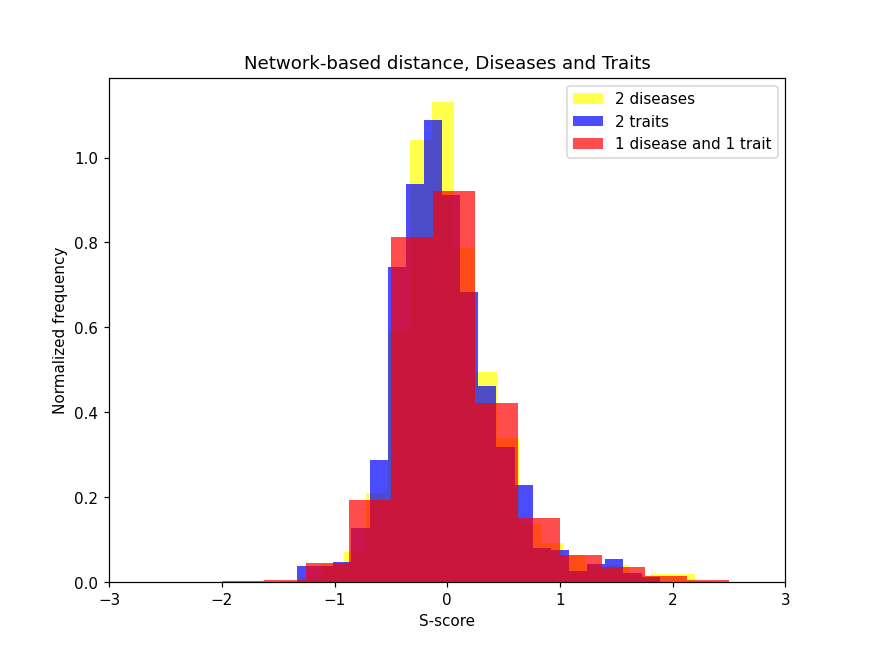

In [79]:
## SCORES VISUALIZATION ##
s_scores_2_diseases = []
s_scores_2_traits = []
s_scores_1_disease = []
for index, row in results_df.iterrows():
    if isinstance(row['status'], str):
        status = row['status'].strip().split(', ')
    else:
        pass
    s_score = row['S_score']
    
    if all(status == 'disease' for status in status):
        if not np.isnan(s_score):
            s_scores_2_diseases.append(s_score)
    elif all(status == 'trait' for status in status):
        if not np.isnan(s_score):
            s_scores_2_traits.append(s_score)
    elif any(status == 'disease' for status in status) and any(status != 'trait' for status in status):
        if not np.isnan(s_score):
            s_scores_1_disease.append(s_score)
plt.figure(figsize=(8, 6))  
plt.hist(s_scores_2_diseases, bins=20, alpha=0.7, label='2 diseases', color='yellow', density='True')
plt.hist(s_scores_2_traits, bins=20, alpha=0.7, label='2 traits', color='blue', density='True')
plt.hist(s_scores_1_disease, bins=20, alpha=0.7, label='1 disease and 1 trait', color='red', density='True')

plt.xlabel('S-score')
plt.ylabel('Normalized frequency')
plt.legend()
plt.title('Network-based distance, Diseases and Traits')
plt.xlim(xmin=-3, xmax=3)
plt.show()


<IPython.core.display.Javascript object>


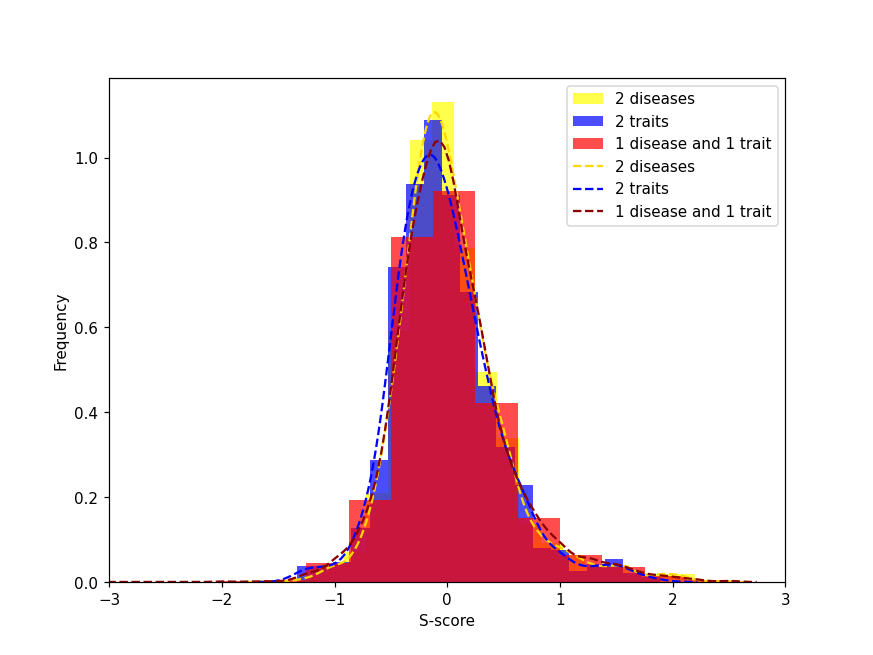

C:\Users\kving\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kving\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kving\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [80]:
import seaborn as sns
plt.figure(figsize=(8, 6))

plt.hist(s_scores_2_diseases, bins=20, alpha=0.7, label='2 diseases', color='yellow', density='True')
plt.hist(s_scores_2_traits, bins=20, alpha=0.7, label='2 traits', color='blue', density='True')
plt.hist(s_scores_1_disease, bins=20, alpha=0.7, label='1 disease and 1 trait', color='red', density='True')
sns.kdeplot(s_scores_2_diseases, color='gold', label='2 diseases', linestyle='--')
sns.kdeplot(s_scores_2_traits, color='blue', label='2 traits', linestyle='--')
sns.kdeplot(s_scores_1_disease, color='darkred', label='1 disease and 1 trait', linestyle='--')

plt.xlabel('S-score')
plt.ylabel('Frequency')
plt.legend(loc= "upper right")
plt.xlim(xmin=-3, xmax=3)
plt.show()